In [4]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
from warnings import filterwarnings
filterwarnings("ignore")

## 1. Import claims_data.csv and cust_data.csv which is provided to you and combine the two datasets appropriately to create a 360-degree view of the data. Use the same for the subsequent questions.

In [5]:
cust = pd.read_csv(r'C:\Users\kirti\OneDrive\Desktop\Python Excel files\cust_demographics.csv')

In [6]:
 claims = pd.read_csv(r'C:\Users\kirti\OneDrive\Desktop\Python Excel files\claims.csv') 

In [9]:
cust.head()

,CUST_ID,gender,DateOfBirth,State,Contact,Segment
0,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum
1,75740424,Female,13-Jan-70,ME,265-543-1264,Silver
2,30308357,Female,11-Mar-84,TN,798-631-4758,Silver
3,47830476,Female,01-May-86,MA,413-187-7945,Silver
4,19269962,Male,13-May-77,NV,956-871-8691,Gold


In [10]:
 claims.head()

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No
2,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes
3,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No
4,22890252,19269962,Crime,01/13/2018,Auto,No,Material only,$2680,1.0,No


## 2. Perform a data audit for the datatypes and find out if there are any mismatch within the current datatypes of the columns and their business significance.

In [11]:
cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1085 entries, 0 to 1084
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   CUST_ID      1085 non-null   int64 
 1   gender       1085 non-null   object
 2   DateOfBirth  1085 non-null   object
 3   State        1085 non-null   object
 4   Contact      1085 non-null   object
 5   Segment      1085 non-null   object
dtypes: int64(1), object(5)
memory usage: 51.0+ KB


In [12]:
 claims.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   claim_id             1100 non-null   int64  
 1   customer_id          1100 non-null   int64  
 2   incident_cause       1100 non-null   object 
 3   claim_date           1100 non-null   object 
 4   claim_area           1100 non-null   object 
 5   police_report        1100 non-null   object 
 6   claim_type           1100 non-null   object 
 7   claim_amount         1035 non-null   object 
 8   total_policy_claims  1090 non-null   float64
 9   fraudulent           1100 non-null   object 
dtypes: float64(1), int64(2), object(7)
memory usage: 86.1+ KB


In [13]:
final  = pd.merge(claims,cust,left_on = 'customer_id', right_on = 'CUST_ID', how = 'left')
                 

In [14]:
final.drop('CUST_ID', axis = 1, inplace = True)

In [15]:
final['claim_date']=pd.to_datetime(final['claim_date'], format= '%m/%d/%Y')

In [16]:
final['DateOfBirth']=pd.to_datetime(final['DateOfBirth'], format = '%d-%b-%y')

## 3. Convert the column claim_amount to numeric. Use the appropriate modules/attributes to remove the $ sign.

In [17]:
final['claim_amount']=final['claim_amount'].str.replace("$", "").astype(float)

In [18]:
final['Contact']=pd.to_numeric(final.Contact.str.replace("-",""),downcast='float')

## 4. Of all the injury claims, some of them have gone unreported with the police. Create an alert flag (1,0) for all such claims.

In [19]:
final['alert_flag']  = np.where((final['claim_type']== 'Injury only')&(final['police_report']=='Unknown'),1,0)

In [20]:
final[(final['claim_type']== 'Injury only')&(final['police_report']=='Unknown')]

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment,alert_flag
76,50337100,15036122,Other driver error,2018-07-20,Auto,Unknown,Injury only,30080.0,1.0,No,Male,1988-03-30,IA,8.932375e+09,Silver,1
78,84635473,74058124,Driver error,2018-01-13,Auto,Unknown,Injury only,21505.0,1.0,Yes,Male,1990-11-12,WV,1.726853e+09,Silver,1
98,712628,74125758,Other causes,2017-11-27,Auto,Unknown,Injury only,22960.0,1.0,No,Male,2061-01-04,LA,8.767869e+09,Gold,1
113,73460630,87993949,Other causes,2018-06-23,Auto,Unknown,Injury only,25783.0,2.0,Yes,Male,1969-05-29,NJ,7.545865e+09,Platinum,1
115,38446319,55782839,Other causes,2017-12-17,Auto,Unknown,Injury only,21300.0,1.0,No,Female,1998-02-07,ND,9.188493e+09,Gold,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
928,54131824,39497409,Other driver error,2018-03-01,Auto,Unknown,Injury only,32867.0,3.0,Yes,Female,1990-10-04,UT,9.765379e+09,Silver,1
963,35136402,98401399,Natural causes,2018-09-06,Auto,Unknown,Injury only,24900.0,1.0,No,Female,2068-10-07,IA,2.195932e+09,Silver,1
985,50022306,10198314,Other causes,2018-05-01,Auto,Unknown,Injury only,28658.0,1.0,Yes,Female,1980-11-10,WI,1.768612e+09,Platinum,1
1023,30903408,77134414,Other driver error,2017-01-07,Auto,Unknown,Injury only,28760.0,1.0,No,Male,1983-07-10,AL,6.932393e+09,Silver,1


## 5. One customer can claim for insurance more than once and in each claim,multiple categories of claims can be involved. However, customer ID should remain unique. Retain the most recent observation and delete any duplicated records in the data based on the customer ID column.

In [21]:
final['customer_id'].duplicated().sum()

7

In [22]:
final = final.drop_duplicates(subset = ['customer_id'],keep='first')

In [23]:
final

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment,alert_flag
0,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,Female,1979-01-12,VT,7.899168e+09,Platinum,0
1,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,Female,1970-01-13,ME,2.655431e+09,Silver,0
2,53522022,30308357,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1.0,Yes,Female,1984-03-11,TN,7.986315e+09,Silver,0
3,13015401,47830476,Natural causes,2018-06-17,Auto,No,Material only,1680.0,1.0,No,Female,1986-05-01,MA,4.131878e+09,Silver,0
4,22890252,19269962,Crime,2018-01-13,Auto,No,Material only,2680.0,1.0,No,Male,1977-05-13,NV,9.568719e+09,Gold,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,97727122,35951012,Other driver error,2017-06-11,Auto,No,Material only,3059.0,4.0,Yes,NaN,NaT,NaN,NaN,NaN,0
1096,10247193,14818669,Natural causes,2018-03-14,Auto,No,Material only,1520.0,2.0,No,NaN,NaT,NaN,NaN,NaN,0
1097,79807493,85322831,Other driver error,2018-02-09,Auto,No,Material and injury,23575.0,2.0,Yes,NaN,NaT,NaN,NaN,NaN,0
1098,69299345,73449366,Other causes,2018-03-21,Auto,Unknown,Material and injury,25120.0,1.0,No,NaN,NaT,NaN,NaN,NaN,0


## 6. Check for missing values and impute the missing values with an appropriate value. (mean for continuous and mode for categorical)

In [24]:
final['customer_id'].duplicated().sum()

0

In [25]:
final.isna().sum()

claim_id                0
customer_id             0
incident_cause          0
claim_date              0
claim_area              0
police_report           0
claim_type              0
claim_amount           65
total_policy_claims    10
fraudulent              0
gender                 15
DateOfBirth            15
State                  15
Contact                15
Segment                15
alert_flag              0
dtype: int64

In [26]:
final.isna().sum()

claim_id                0
customer_id             0
incident_cause          0
claim_date              0
claim_area              0
police_report           0
claim_type              0
claim_amount           65
total_policy_claims    10
fraudulent              0
gender                 15
DateOfBirth            15
State                  15
Contact                15
Segment                15
alert_flag              0
dtype: int64

In [27]:
catagorical_col = ["gender","State","Segment","incident_cause","claim_area","claim_type","fraudulent"]
continuous_col = ["claim_amount"]

In [28]:
for col in catagorical_col:
    final[col]= final[col].fillna(final[col].mode()[0])


    

In [29]:
final[continuous_col] = final[continuous_col].fillna(final[continuous_col].mean())


In [30]:
final.isna().sum()

claim_id                0
customer_id             0
incident_cause          0
claim_date              0
claim_area              0
police_report           0
claim_type              0
claim_amount            0
total_policy_claims    10
fraudulent              0
gender                  0
DateOfBirth            15
State                   0
Contact                15
Segment                 0
alert_flag              0
dtype: int64

In [31]:
final.tail(20)

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment,alert_flag
1080,62020796,79539873,Other driver error,2018-09-06,Auto,Yes,Material only,1770.0,1.0,No,Female,1981-03-15,ND,4.594254e+09,Platinum,0
1081,63269067,42364152,Other causes,2017-05-09,Home,No,Material only,2800.0,1.0,No,Female,1996-07-07,ID,5.294622e+09,Silver,0
1082,22690595,19888166,Other driver error,2017-05-15,Auto,Yes,Injury only,33080.0,2.0,No,Male,1990-04-11,WI,7.126520e+09,Gold,0
1083,12376894,11256802,Other driver error,2017-04-18,Auto,No,Material only,2840.0,4.0,No,Female,2064-10-22,LA,4.693456e+09,Silver,0
1084,63226031,61575264,Natural causes,2017-03-16,Auto,No,Material only,1490.0,1.0,No,Male,1995-07-12,WY,1.823851e+09,Gold,0
1085,5829074,2379897,Other causes,2018-07-20,Auto,No,Material only,2080.0,1.0,No,Male,NaT,NY,NaN,Gold,0
1086,12632133,49290530,Natural causes,2018-10-30,Auto,No,Material only,2875.0,1.0,Yes,Male,NaT,NY,NaN,Gold,0
1087,45052103,55466148,Driver error,2017-12-03,Auto,No,Injury only,29010.0,1.0,No,Male,NaT,NY,NaN,Gold,0
1088,87003624,99120304,Other causes,2017-03-22,Auto,No,Material only,1710.0,1.0,No,Male,NaT,NY,NaN,Gold,0
1089,1680169,65061027,Natural causes,2017-05-02,Auto,Unknown,Material only,1030.0,4.0,No,Male,NaT,NY,NaN,Gold,0


## 7. Calculate the age of customers in years. Based on the age, categorize the customers according to the below criteria

In [32]:
final["age"] = ((final.claim_date- final.DateOfBirth).dt.days)//365.25
final

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment,alert_flag,age
0,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,Female,1979-01-12,VT,7.899168e+09,Platinum,0,38.0
1,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,Female,1970-01-13,ME,2.655431e+09,Silver,0,48.0
2,53522022,30308357,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1.0,Yes,Female,1984-03-11,TN,7.986315e+09,Silver,0,33.0
3,13015401,47830476,Natural causes,2018-06-17,Auto,No,Material only,1680.0,1.0,No,Female,1986-05-01,MA,4.131878e+09,Silver,0,32.0
4,22890252,19269962,Crime,2018-01-13,Auto,No,Material only,2680.0,1.0,No,Male,1977-05-13,NV,9.568719e+09,Gold,0,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,97727122,35951012,Other driver error,2017-06-11,Auto,No,Material only,3059.0,4.0,Yes,Male,NaT,NY,NaN,Gold,0,NaN
1096,10247193,14818669,Natural causes,2018-03-14,Auto,No,Material only,1520.0,2.0,No,Male,NaT,NY,NaN,Gold,0,NaN
1097,79807493,85322831,Other driver error,2018-02-09,Auto,No,Material and injury,23575.0,2.0,Yes,Male,NaT,NY,NaN,Gold,0,NaN
1098,69299345,73449366,Other causes,2018-03-21,Auto,Unknown,Material and injury,25120.0,1.0,No,Male,NaT,NY,NaN,Gold,0,NaN


In [33]:
bins = [0,18,30,60, float('inf')]
labels = ["Children", "Youth", "Adult", "Senior"]
final["age_group"]= pd.cut(final["age"], bins = bins,labels = labels,right = False)
final


,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment,alert_flag,age,age_group
0,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,Female,1979-01-12,VT,7.899168e+09,Platinum,0,38.0,Adult
1,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,Female,1970-01-13,ME,2.655431e+09,Silver,0,48.0,Adult
2,53522022,30308357,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1.0,Yes,Female,1984-03-11,TN,7.986315e+09,Silver,0,33.0,Adult
3,13015401,47830476,Natural causes,2018-06-17,Auto,No,Material only,1680.0,1.0,No,Female,1986-05-01,MA,4.131878e+09,Silver,0,32.0,Adult
4,22890252,19269962,Crime,2018-01-13,Auto,No,Material only,2680.0,1.0,No,Male,1977-05-13,NV,9.568719e+09,Gold,0,40.0,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,97727122,35951012,Other driver error,2017-06-11,Auto,No,Material only,3059.0,4.0,Yes,Male,NaT,NY,NaN,Gold,0,NaN,NaN
1096,10247193,14818669,Natural causes,2018-03-14,Auto,No,Material only,1520.0,2.0,No,Male,NaT,NY,NaN,Gold,0,NaN,NaN
1097,79807493,85322831,Other driver error,2018-02-09,Auto,No,Material and injury,23575.0,2.0,Yes,Male,NaT,NY,NaN,Gold,0,NaN,NaN
1098,69299345,73449366,Other causes,2018-03-21,Auto,Unknown,Material and injury,25120.0,1.0,No,Male,NaT,NY,NaN,Gold,0,NaN,NaN


## 8. What is the average amount claimed by the customers from various segments?

In [34]:
final.groupby('Segment')['claim_amount'].mean()

Segment
Gold        12675.262946
Platinum    12368.233815
Silver      12267.349306
Name: claim_amount, dtype: float64

## 9. What is the total claim amount based on incident cause for all the claims hat have been done at least 20 days prior to 1st of October, 2018.

In [36]:
final.loc[final['claim_date']<"2018-09-10",:].groupby(['incident_cause'])['claim_amount'].sum()

incident_cause
Crime                 7.294856e+05
Driver error          3.292987e+06
Natural causes        1.315024e+06
Other causes          3.779919e+06
Other driver error    3.384079e+06
Name: claim_amount, dtype: float64

## 10. How many adults from TX, DE and AK claimed insurance for driver related issues and causes?

In [37]:
final.loc[((final['State'] == "TX") | (final['State'] == "DE" )|( final['State'] == "Ak" )) & ((final["incident_cause"] =="Driver error") | (final["incident_cause"] ==" Other driver error"))& (final["age_group"] == "Adult")]

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment,alert_flag,age,age_group
184,69348631,154557,Driver error,2018-04-10,Auto,No,Injury only,12444.72714,1.0,Yes,Female,1978-05-23,DE,9.628791e+09,Platinum,0,39.0,Adult
426,22577147,66433138,Driver error,2017-02-23,Auto,No,Material and injury,21447.50000,2.0,Yes,Male,1978-06-27,TX,7.526174e+09,Gold,0,38.0,Adult
547,86096444,65899365,Driver error,2018-07-14,Auto,No,Material and injury,34160.00000,1.0,No,Female,1973-07-25,TX,1.359719e+09,Platinum,0,44.0,Adult
984,17396013,44050095,Driver error,2017-03-22,Auto,Unknown,Material and injury,20458.50000,1.0,Yes,Male,1977-06-04,DE,3.142989e+09,Platinum,0,39.0,Adult


## 11 Draw a pie chart between the aggregated value of claim amount based on gender and segment. Represent the claim amount as a percentage on the pie chart.

In [38]:
gender_seg= final.pivot_table(index = 'Segment', columns = 'gender', values = "claim_amount")
gender_seg

gender,Female,Male
Segment,,
Gold,12336.441779,12944.743967
Platinum,12276.285440,12473.864983
Silver,11645.542655,12821.198946


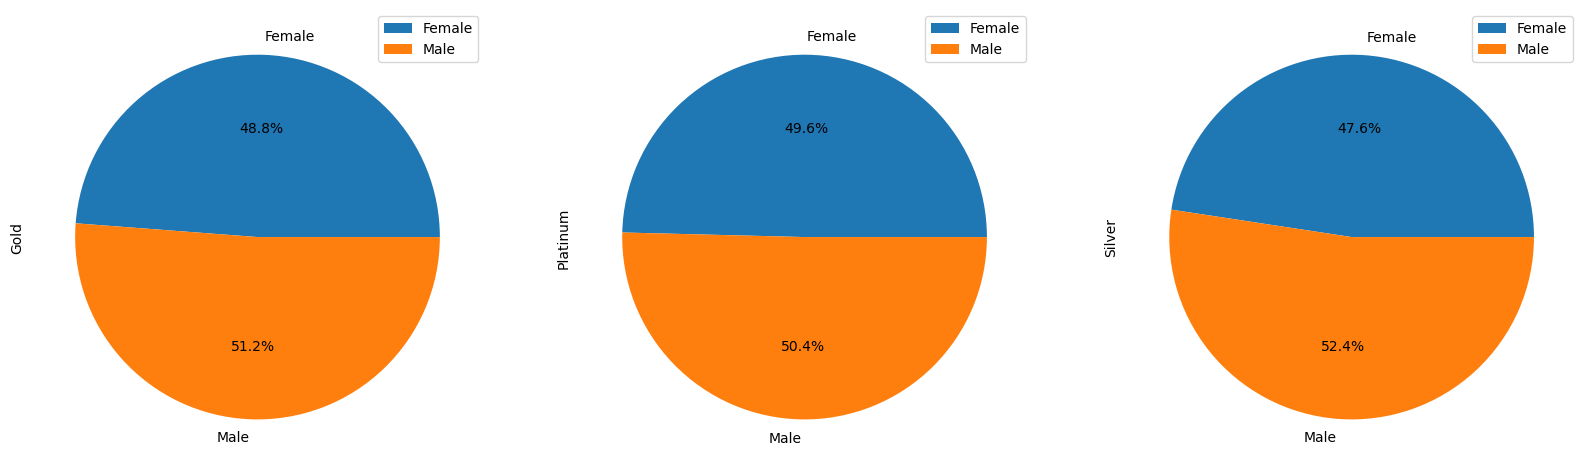

In [39]:
gender_seg.T.plot(kind = "pie", subplots = True, legend = True, figsize = (20,10), autopct = '%1.1f%%')
plt.show()

## 12. Among males and females, which gender had claimed the most for any type of driver related issues? E.g. This metric can be compared using a bar chart

In [40]:
df1 = final.loc[final.incident_cause.isin(['Driver error','Other driver error'])]

In [41]:
gender_seg = df1.groupby(['gender',]) ['incident_cause'].count().add_prefix("Count Of_").reset_index()

In [42]:
gender_seg

,gender,incident_cause
0,Count Of_Female,221
1,Count Of_Male,285


<Axes: xlabel='gender', ylabel='incident_cause'>

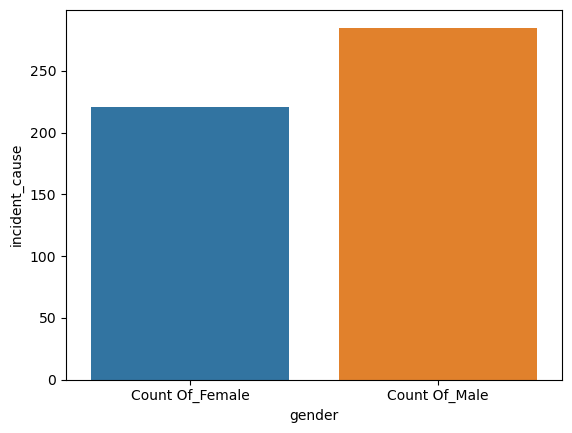

In [43]:
sns.barplot(x = 'gender', y = 'incident_cause', data = gender_seg)

# 13. Which age group had the maximum fraudulent policy claims? Visualiz it on a bar chart.

In [44]:
final

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment,alert_flag,age,age_group
0,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,Female,1979-01-12,VT,7.899168e+09,Platinum,0,38.0,Adult
1,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,Female,1970-01-13,ME,2.655431e+09,Silver,0,48.0,Adult
2,53522022,30308357,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1.0,Yes,Female,1984-03-11,TN,7.986315e+09,Silver,0,33.0,Adult
3,13015401,47830476,Natural causes,2018-06-17,Auto,No,Material only,1680.0,1.0,No,Female,1986-05-01,MA,4.131878e+09,Silver,0,32.0,Adult
4,22890252,19269962,Crime,2018-01-13,Auto,No,Material only,2680.0,1.0,No,Male,1977-05-13,NV,9.568719e+09,Gold,0,40.0,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,97727122,35951012,Other driver error,2017-06-11,Auto,No,Material only,3059.0,4.0,Yes,Male,NaT,NY,NaN,Gold,0,NaN,NaN
1096,10247193,14818669,Natural causes,2018-03-14,Auto,No,Material only,1520.0,2.0,No,Male,NaT,NY,NaN,Gold,0,NaN,NaN
1097,79807493,85322831,Other driver error,2018-02-09,Auto,No,Material and injury,23575.0,2.0,Yes,Male,NaT,NY,NaN,Gold,0,NaN,NaN
1098,69299345,73449366,Other causes,2018-03-21,Auto,Unknown,Material and injury,25120.0,1.0,No,Male,NaT,NY,NaN,Gold,0,NaN,NaN


In [45]:
age_group_fraud = final[final.fraudulent== 'Yes'].groupby(['age_group'])['fraudulent'].count().reset_index()

<Axes: xlabel='age_group', ylabel='fraudulent'>

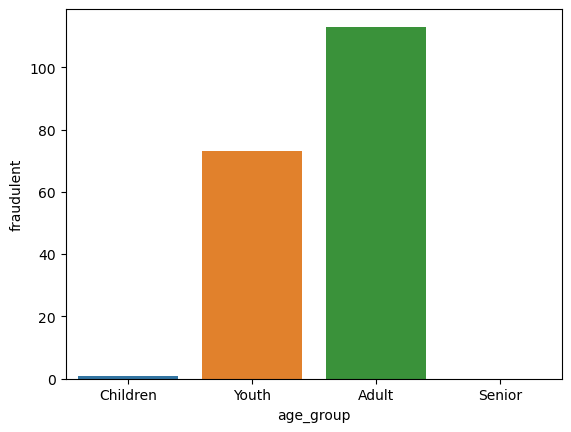

In [46]:
sns.barplot( x='age_group', y= 'fraudulent', data=age_group_fraud , ci=None)

## .14 Visualize the monthly trend of the total amount that has been claimed by the customers. Ensure that on the “month” axis, the month is in a chronological order not alphabetical order.

In [47]:
final['month date'] = final['claim_date'].dt.month

In [48]:
monthly_trend_data = final.groupby(["month date"])[["claim_amount"]].sum().reset_index()

In [49]:
monthly_trend_data

,month date,claim_amount
0,1,1.331832e+06
1,2,1.156579e+06
2,3,1.348315e+06
3,4,1.276020e+06
4,5,1.115035e+06
5,6,1.317728e+06
6,7,1.382493e+06
7,8,9.134147e+05
8,9,9.803903e+05
9,10,1.428671e+06


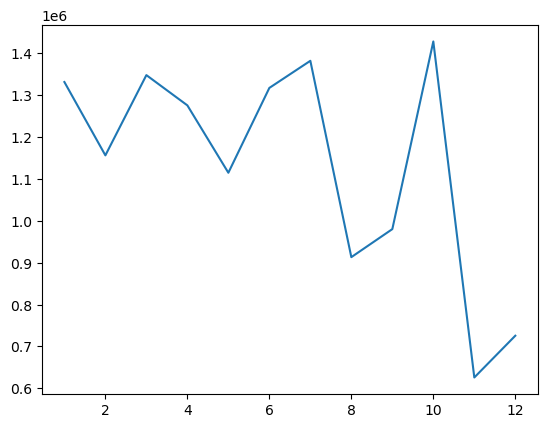

In [50]:
plt.plot(monthly_trend_data['month date'], monthly_trend_data['claim_amount'], label = 'Trend Line')

## 15. What is the average claim amount for gender and age categories and suitably represent the above using a facetted bar chart, one facet that represents fraudulent claims and the other for non-fraudulent claims.

## Hypothesis Testing 
Based on the conclusions from exploratory analysis as well as suitable
statistical tests, answer the below questions. Please include a detailed
write-up on the parameters taken into consideration, the Hypothesis
testing steps, conclusion from the p-values and the business implications of
the statements.

## 16. Is there any similarity in the amount claimed by males and females?

In [51]:
import scipy.stats as stats

In [52]:
## Ho = there is no relationship
## Ha = there is relationship
## CI = 95%
## significance level = 0.05
male=final[final['gender'] =='Male']['claim_amount']
female=final[final['gender'] =='Female']['claim_amount']


In [53]:
stats.ttest_ind(male, female)

TtestResult(statistic=0.821612848932144, pvalue=0.4114767802889234, df=1091.0)

In [54]:
## since p value>alpha hence we will accept Ho and hence there is no significant relationship bw males and females claim amount

In [55]:
final

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment,alert_flag,age,age_group,month date
0,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,Female,1979-01-12,VT,7.899168e+09,Platinum,0,38.0,Adult,11
1,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,Female,1970-01-13,ME,2.655431e+09,Silver,0,48.0,Adult,10
2,53522022,30308357,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1.0,Yes,Female,1984-03-11,TN,7.986315e+09,Silver,0,33.0,Adult,2
3,13015401,47830476,Natural causes,2018-06-17,Auto,No,Material only,1680.0,1.0,No,Female,1986-05-01,MA,4.131878e+09,Silver,0,32.0,Adult,6
4,22890252,19269962,Crime,2018-01-13,Auto,No,Material only,2680.0,1.0,No,Male,1977-05-13,NV,9.568719e+09,Gold,0,40.0,Adult,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,97727122,35951012,Other driver error,2017-06-11,Auto,No,Material only,3059.0,4.0,Yes,Male,NaT,NY,NaN,Gold,0,NaN,NaN,6
1096,10247193,14818669,Natural causes,2018-03-14,Auto,No,Material only,1520.0,2.0,No,Male,NaT,NY,NaN,Gold,0,NaN,NaN,3
1097,79807493,85322831,Other driver error,2018-02-09,Auto,No,Material and injury,23575.0,2.0,Yes,Male,NaT,NY,NaN,Gold,0,NaN,NaN,2
1098,69299345,73449366,Other causes,2018-03-21,Auto,Unknown,Material and injury,25120.0,1.0,No,Male,NaT,NY,NaN,Gold,0,NaN,NaN,3


## 17. Is there any relationship between age category and segment?

In [56]:
obs_freq = pd.crosstab(final.Segment,final.age_group)
obs_freq

age_group,Children,Youth,Adult
Segment,,,
Gold,4,105,181
Platinum,4,117,157
Silver,0,105,160


In [57]:
stats.chi2_contingency(obs_freq)

Chi2ContingencyResult(statistic=5.8611209860157905, pvalue=0.20976268510394575, dof=4, expected_freq=array([[  2.78511405, 113.84153661, 173.37334934],
       [  2.66986795, 109.13085234, 166.19927971],
       [  2.54501801, 104.02761104, 158.42737095]]))

In [58]:
print ("Conclusion: Pvalue is > 0.05. Hence we accept Null Hypothesis H0 and There is no relationship between age category and segment" )

Conclusion: Pvalue is > 0.05. Hence we accept Null Hypothesis H0 and There is no relationship between age category and segment


## 18. The current year has shown a significant rise in claim amounts as compared to 2016-17 fiscal average which was $10,000.

In [59]:

from scipy.stats import ttest_1samp

In [60]:
final['claim_year'] = final.claim_date.dt.year

In [64]:
ttest_1samp(final[final['claim_date'].dt.year == 2017]['claim_amount'], 10000)


TtestResult(statistic=4.258588422072149, pvalue=2.3853131901636887e-05, df=604)

## 19. Is there any difference between age groups and insurance claims?

In [77]:
var = 'claim_amount'
s1 = final.loc[ final.age_group == 'Adult', var ]
s2 = final.loc[ final.age_group == 'Youth', var ]
s3 = final.loc[ final.age_group == 'Children', var ]

In [78]:
stats.f_oneway(s1,s2,s3)

F_onewayResult(statistic=2.631357213332585, pvalue=0.07258114570632278)

In [79]:
print("conclusion : since p values > 0.05 hence we do not reject the null hypothesis and hence there is no difference between age group and insurance claim")

conclusion : since p values > 0.05 hence we do not reject the null hypothesis and hence there is no difference between age group and insurance claim


## 20. Is there any relationship between total number of policy claims and the claimed amount?

In [80]:
final.total_policy_claims.value_counts()

total_policy_claims
1.0    789
2.0    106
3.0     89
4.0     60
5.0     27
6.0      9
7.0      2
8.0      1
Name: count, dtype: int64

In [84]:
final.columns

Index(['claim_id', 'customer_id', 'incident_cause', 'claim_date', 'claim_area',
       'police_report', 'claim_type', 'claim_amount', 'total_policy_claims',
       'fraudulent', 'gender', 'DateOfBirth', 'State', 'Contact', 'Segment',
       'alert_flag', 'age', 'age_group', 'month date', 'claim_year'],
      dtype='object')

In [85]:
var = 'claim_amount'

In [86]:
s1 = final.loc[ final.total_policy_claims == 1.0, var ]
s2 = final.loc[ final.total_policy_claims == 2.0, var ]
s3 = final.loc[ final.total_policy_claims == 3.0, var ]
s4 = final.loc[ final.total_policy_claims == 4.0, var ]
s5 = final.loc[ final.total_policy_claims == 5.0, var ]
s6 = final.loc[ final.total_policy_claims == 6.0, var ]
s7 = final.loc[ final.total_policy_claims == 7.0, var ]
s8 = final.loc[ final.total_policy_claims == 8.0, var ]

In [87]:
stats.f_oneway( s1, s2, s3, s4, s5, s6, s7, s8 )

F_onewayResult(statistic=0.9807920097719507, pvalue=0.44364234199312325)

In [89]:
print("Conclusion : Since p value > Ho hence we accept Ho and there is a reltionship between policy claims and claimed amount")

Conclusion : Since p value > Ho hence we accept Ho and there is a reltionship between policy claims and claimed amount
